# Titanic Survival Prediction Using Logistic Regression

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fatemearyaie/Titanic-Survival/main/titanic.csv")

## Data Cleaning/Data Analysis/EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
def age(col):
    age = col[0]
    Pclass = col[1]
    if pd.isnull(age):
        
        if Pclass == 1:
            return df[df['Pclass']==1]['Age'].mean()
        elif Pclass == 2:
            return df[df['Pclass']==2]['Age'].mean()
        else:
            return df[df['Pclass']==3]['Age'].mean()
    else:
        return age

In [9]:
df['Age'] = df[['Age','Pclass']].apply(age,axis=1)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.drop('Cabin', axis=1, inplace=True)

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [14]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [15]:
getembarkes = pd.get_dummies(df['Embarked'])

In [16]:
titanic = pd.concat([df,getembarkes],axis=1)

In [17]:
titanic.drop(['Embarked','PassengerId'], inplace=True, axis=1)

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


## visualization

<AxesSubplot:>

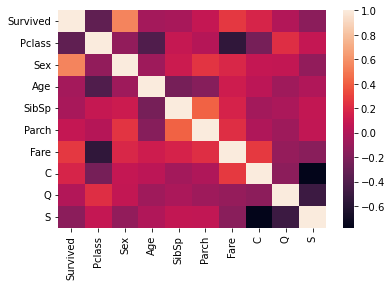

In [19]:
corr = titanic.corr()
sns.heatmap(corr)

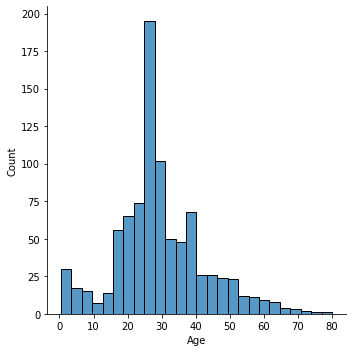

In [20]:
sns.displot(titanic['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

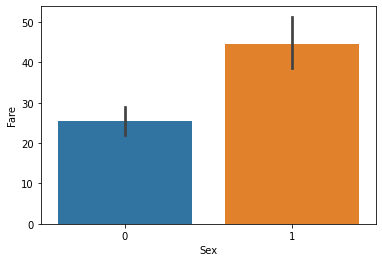

In [21]:
sns.barplot(data=titanic, x='Sex', y='Fare')

<AxesSubplot:xlabel='Survived', ylabel='count'>

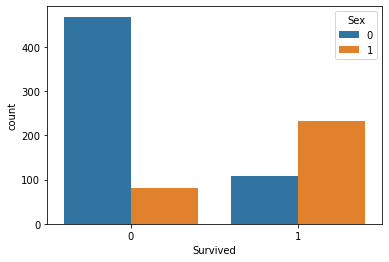

In [22]:
sns.countplot(data=titanic, x='Survived', hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

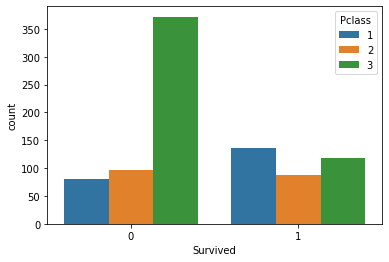

In [23]:
sns.countplot(data=titanic, x='Survived', hue="Pclass")

<AxesSubplot:>

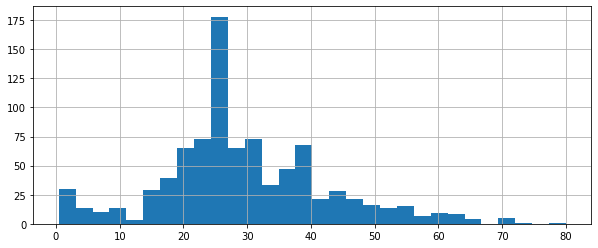

In [24]:
titanic['Age'].hist(bins=30,figsize=(10,4))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

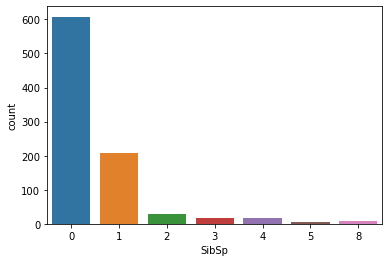

In [25]:
sns.countplot(data=titanic, x='SibSp')

<AxesSubplot:>

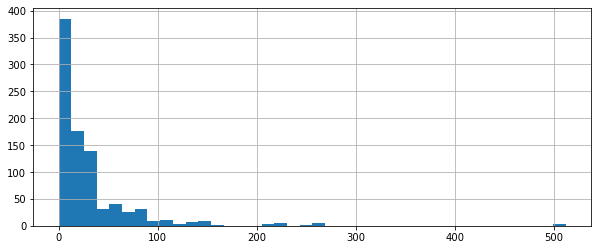

In [26]:
titanic['Fare'].hist(bins=40,figsize=(10,4))

## model development

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
X = titanic.drop('Survived', axis=1)
Y = titanic[['Survived']]

In [30]:
X_train, X_test, Y_train , Y_test  = train_test_split(X,Y, random_state=2, test_size=0.3)

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictionlr = lr.predict(X_test)

## evaluation

In [34]:
from sklearn.metrics import log_loss, jaccard_score, f1_score

In [35]:
lr.score(X_test, Y_test)

0.8022388059701493

In [36]:
log_loss(Y_test, predictionlr)

6.830480380920074

In [37]:
jaccard_score(Y_test, predictionlr)

0.576

In [38]:
f1_score(Y_test, predictionlr)

0.7309644670050761

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(Y_test,predictionlr)

array([[143,  17],
       [ 36,  72]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(Y_test,predictionlr))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       160
           1       0.81      0.67      0.73       108

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

